In [13]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from kmodes import kmodes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import sys

In [2]:
RANGE = 10

In [3]:
df = pd.read_csv('mission_1.csv')

data = []
for _, d in df.iterrows():
    data.append(d.tolist()[1:])
data = np.array(data)

## (n, 2) TEST BEGIN

In [174]:
data = [
    [1 ,2],
    [2, 1],
    [3, 1],
    [3, 2],
    [1, 1],
    [8, 8],
    [9, 9],
    [8, 10],
    [7, 9],
    [6, 9],
    [10, 8],
    [10, 1],
    [8, 3],
    [7, 1],
    [10, 2],
    [9, 4]
]
data = np.array(data)

## (n, 2) TEST END

In [4]:
cluster_inertia = []
for k in xrange(1, RANGE):
    k_means_model = KMeans(n_clusters=k).fit(data)
    cluster_inertia.append(k_means_model.inertia_)
    
print('K Values: ', cluster_inertia)

K Values:  [770189.04530001362, 178408.40056733019, 44665.019586070761, 18847.472641906184, 12348.718000193581, 8194.216388458839, 6137.1397704595183, 5103.042213614387, 4399.4867201398265]


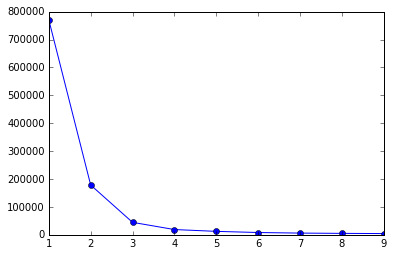

In [5]:
plt.plot(xrange(1, RANGE), cluster_inertia, marker='o')

In [6]:
k_means_model = KMeans(n_clusters=3).fit(data)

centroids = k_means_model.cluster_centers_
labels = k_means_model.labels_

print(centroids)
print(labels)

[[  1.50882179e+09   4.16831683e+00   2.81188119e+00   5.05824354e-01
    1.00990099e+00]
 [  1.50882157e+09   4.50000000e+00   1.50000000e+00   4.27811443e-01
    9.00000000e-01]
 [  1.50882184e+09   4.53535354e+00   2.96969697e+00   4.40190160e-01
    8.68686869e-01]]
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## (n, 2) TEST BEGIN

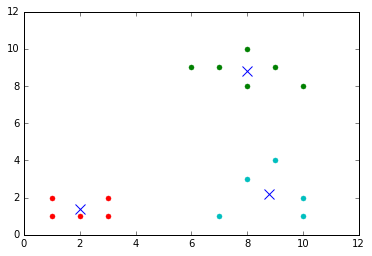

In [179]:
colors = ["g.", "r.", "c.", "y."]

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], colors[labels[i]], markersize=10)

plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, linewidths=1, zorder=10)

## (n, 2) TEST END

In [61]:
centroid_shape = centroids.shape[0]

prototypes = np.zeros((centroid_shape, 2))

for i in xrange(centroid_shape):
    for j in xrange(labels.shape[0]):
        if labels[j] == i:
            dist = np.linalg.norm(centroids[i] - data[j])
            
            if not prototypes[i][1]:
                prototypes[i][0] = j
                prototypes[i][1] = dist
                continue
                
            if dist < prototypes[i][1]:
                prototypes[i][0] = j
                prototypes[i][1] = dist
                
prototypes

array([[  59.        ,    2.15467447],
       [   7.        ,    1.07736338],
       [ 162.        ,    2.72028003]])

In [10]:
for i in xrange(prototypes.shape[0]):
    print(data[int(prototypes[:, 0][i])])

[  1.50882179e+09   5.00000000e+00   4.00000000e+00   5.83673957e-01
   1.00000000e+00]
[  1.50882157e+09   5.00000000e+00   1.00000000e+00   3.95011177e-01
   1.00000000e+00]
[  1.50882184e+09   3.00000000e+00   2.00000000e+00   3.36379766e-01
   1.00000000e+00]


### The robot [action] when presented with a [type] query with a confidence [confidence]%.
### Which action would you prefer for the robot to make next time:
### 1 - Same action
### 2, 3 - Next two

In [52]:
def survey_func(survey):
    sys.stdout.write('The robot ')
    if int(survey[4]) == 0:
        sys.stdout.write('was fully autonomous')
    elif int(survey[4]) == 1:
        sys.stdout.write('stopped and waited for your input')
    elif int(survey[4]) == 2:
        sys.stdout.write('continued its task and asked for your answer later')

    sys.stdout.write(' when presented with a ')

    if int(survey[2]) == 0:
        sys.stdout.write('visual')
    elif int(survey[2]) == 1:
        sys.stdout.write('tagging')
    elif int(survey[2]) == 2:
        sys.stdout.write('path')
    elif int(survey[2]) == 3:
        sys.stdout.write('communication')
    elif int(survey[2]) == 4:
        sys.stdout.write('robot health')
    elif int(survey[2]) == 5:
        sys.stdout.write('audio')
    elif int(survey[2]) == 6:
        sys.stdout.write('task')

    sys.stdout.write(' query with a confidence of ')

    sys.stdout.write('{}%\n'.format(int(survey[3]*100)))
    
    sys.stdout.write('Which action would you prefer for the robot to make next time:\n')
    sys.stdout.write('1 - Same action\n')
    if int(survey[4]) == 0:
        sys.stdout.write('2 - Stop and ask\n')
        sys.stdout.write('3 - Continue but still ask\n')
        
        result = input()
        if result == 1:
            return survey[4]
        elif result == 2:
            return 2
        elif result == 3:
            return 3
    elif int(survey[4]) == 1:
        sys.stdout.write('2 - Fully autonomous\n')
        sys.stdout.write('3 - Continue but still ask\n')
        
        result = input()
        if result == 1:
            return survey[4]
        elif result == 2:
            return 0
        elif result == 3:
            return 2
    elif int(survey[4]) == 2:
        sys.stdout.write('2 - Fully autonomous\n')
        sys.stdout.write('3 - Stop and ask\n')
        
        result = input()
        if result == 1:
            return survey[4]
        elif result == 2:
            return 1
        elif result == 3:
            return 2

In [68]:
cluster_labels = dict()
for p in prototypes[:, 0]:
    preferred_action = survey_func(data[int(p)])
    cluster_labels[labels[int(p)]] = preferred_action

The robot stopped and waited for your input when presented with a robot health query with a confidence of 58%
Which action would you prefer for the robot to make next time:
1 - Same action
2 - Fully autonomous
3 - Continue but still ask
1
The robot stopped and waited for your input when presented with a tagging query with a confidence of 39%
Which action would you prefer for the robot to make next time:
1 - Same action
2 - Fully autonomous
3 - Continue but still ask
2
The robot stopped and waited for your input when presented with a path query with a confidence of 33%
Which action would you prefer for the robot to make next time:
1 - Same action
2 - Fully autonomous
3 - Continue but still ask
3


In [69]:
cluster_labels

{0: 1.0, 1: 0, 2: 2}

In [11]:
k_means_model.predict([[2e+09, 8, 2, 2e-01, 0]])

array([2], dtype=int32)